# Edited by Ashen; 微信公众号:爱研思谈; Github:AshenOneme

In [20]:
import openseespy.opensees as ops
import opsvis as opsv
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import MultipleLocator,FormatStrFormatter
from pylab import *
import os

## 摩擦阻尼器本构测试

ElasticPPMaterial::ElasticPPMaterial() - eyn > 0, setting < 0


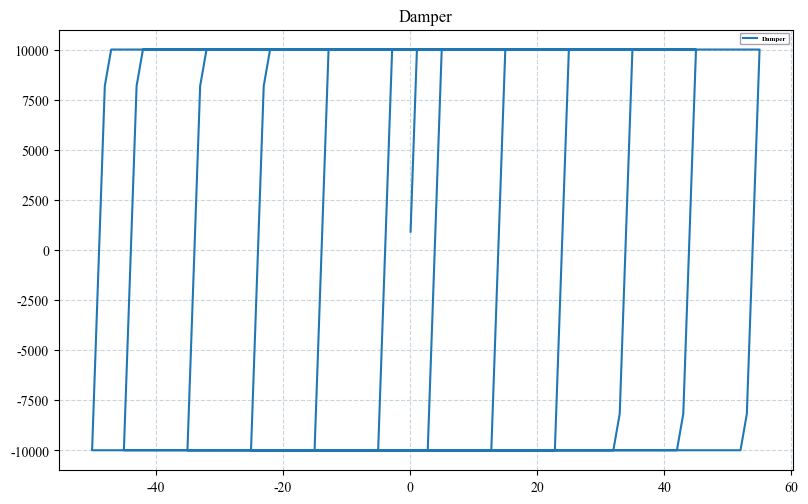

In [21]:
if not os.path.exists('ElasticPP'):
    os.makedirs('ElasticPP')

font_Times_New_Roman={"family":"Times New Roman",
                        # "style": "italic",
                        "weight":"heavy",
                        "size":5}
font_Times_New_Roman_legend={"family":"Times New Roman",
                        # "style": "italic",
                        "weight":"heavy",
                        "size":5}

font_Song={"family":"SimSun",
        "style":"italic",
        "weight":"heavy",
        "size":15}
plt.rcParams['font.sans-serif']=['Times New Roman']
plt.rc('axes', unicode_minus=False)
fig,ax=plt.subplots(nrows=1,ncols=1,figsize=(8,5),dpi=100)
# fig.subplots_adjust(left=0.15,right=0.95,top=0.95,bottom=0.15)
fig.tight_layout()
bwith = 1.5 

ops.wipe()
ops.model('basic', '-ndm', 2, '-ndf', 3)
IDDamper = 2
E=10000
epsyP=1
epsyN=1
ops.uniaxialMaterial('ElasticPP', IDDamper, E, epsyP, epsyN,0.0)
ops.node(1,0,0)
ops.node(2,100,0)
ops.equalDOF(1,2,2,3)
ops.fix(1,1,1,1)
ops.fix(2,0,1,1)
ops.element('twoNodeLink',1,1,2,'-mat',IDDamper,'-dir',1)
ops.recorder('Node', '-file', f"./ElasticPP/ElasticPP_Disp.txt","-time",'-node', 2, '-dof',1, 'disp')
ops.recorder('Node', '-file', f"./ElasticPP/ElasticPP_Reaction.txt","-time",'-node', 1, '-dof',1, 'reaction')
ops.timeSeries('Linear', 11)
ops.pattern('Plain', 100,11)
ops.sp(2,1,1)
ops.system("BandGeneral")
ops.numberer("RCM")
ops.constraints("Penalty",1e5,1e5)
ops.test('NormDispIncr', 1e-5, 2000)
ops.algorithm("KrylovNewton")

ops.integrator("DisplacementControl",2,1,-0.1)
ops.analysis("Static")
ops.analyze(50)

ops.integrator("DisplacementControl",2,1,0.1)
ops.analysis("Static")
ops.analyze(100)

ops.integrator("DisplacementControl",2,1,-0.1)
ops.analysis("Static")
ops.analyze(200)

ops.integrator("DisplacementControl",2,1,0.1)
ops.analysis("Static")
ops.analyze(300)

ops.integrator("DisplacementControl",2,1,-0.1)
ops.analysis("Static")
ops.analyze(400)

ops.integrator("DisplacementControl",2,1,0.1)
ops.analysis("Static")
ops.analyze(500)

ops.integrator("DisplacementControl",2,1,-1)
ops.analysis("Static")
ops.analyze(60)

ops.integrator("DisplacementControl",2,1,1)
ops.analysis("Static")
ops.analyze(70)

ops.integrator("DisplacementControl",2,1,-1)
ops.analysis("Static")
ops.analyze(80)

ops.integrator("DisplacementControl",2,1,1)
ops.analysis("Static")
ops.analyze(90)

ops.integrator("DisplacementControl",2,1,-1)
ops.analysis("Static")
ops.analyze(100)

ops.integrator("DisplacementControl",2,1,1)
ops.analysis("Static")
ops.analyze(105)

ops.integrator("DisplacementControl",2,1,-1)
ops.analysis("Static")
ops.analyze(50)

ops.wipe()

Disp=np.loadtxt(f'./ElasticPP/ElasticPP_Disp.txt',usecols=1)
Force=np.loadtxt(f'./ElasticPP/ElasticPP_Reaction.txt',usecols=1)

ax.plot(-Disp,Force,label='Damper')

ax.grid(linestyle='--',color='#c9d6df')                      

ax.set_title(f'Damper')
ax.legend(prop=font_Times_New_Roman_legend,edgecolor='#928a97',facecolor='none')
plt.show()

## 建立钢框架

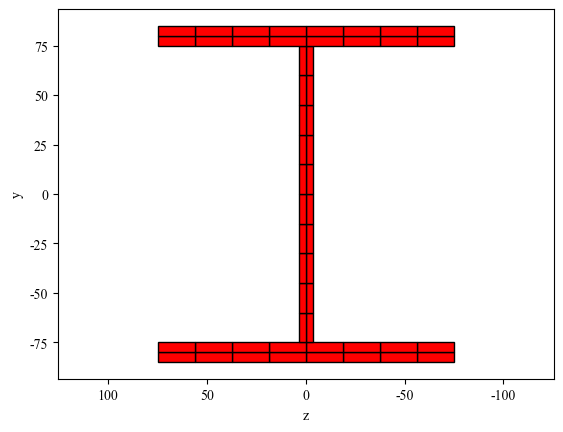

In [22]:
ops.wipe() # 初始清空
ops.model('basic', '-ndm', 3, '-ndf', 6)  # frame 3D
IDSteel = 1
Fy_Steel = 335
E0_Steel = 206000
bs_Steel = 0.005
R0 = 12.5
cR1 = 0.925
cR2 = 0.15
ops.uniaxialMaterial('Steel02', IDSteel, Fy_Steel, E0_Steel, bs_Steel,R0,cR1,cR2)

HI=150
WI=150
cx=10
cy=7

A=[-HI/2-cx,-WI/2]
B=[-HI/2,WI/2]
C=[-HI/2,-cy/2]
D=[HI/2,cy/2]
E=[HI/2,-WI/2]
F=[HI/2+cx,WI/2]

fiber_column_section=1
ops.section('Fiber', fiber_column_section, '-GJ', 1.0e6)
ops.patch('rect', IDSteel, 1, 4, A[0], A[1], B[0], B[1])
ops.patch('rect', IDSteel, 4, 1, C[0], C[1], D[0], D[1])
ops.patch('rect', IDSteel, 1, 4, E[0], E[1], F[0], F[1])

fib_sec_1 = [['section', 'Fiber', 1, '-GJ', 1.0e6],
             ['patch', 'rect', IDSteel, 2, 8, A[0], A[1], B[0], B[1]],
             ['patch', 'rect', IDSteel, 10, 2, C[0], C[1], D[0], D[1]],
             ['patch', 'rect', IDSteel, 2, 8, E[0], E[1], F[0], F[1]],
             ]

matcolor = ['r']
opsv.plot_fiber_section(fib_sec_1, matcolor=matcolor)
plt.axis('equal')
plt.show()

In [23]:
ops.node(1,-3000,0,0)
ops.node(2,3000,0,0)
ops.node(3,0,3400,0)
ops.node(4,-3000,3600,0)
ops.node(5,-200,3600,0)
ops.node(6,0,3600,0)
ops.node(7,200,3600,0)
ops.node(8,3000,3600,0)

ops.node(9,0,3400+3600,0)
ops.node(10,-3000,3600+3600,0)
ops.node(11,-200,3600+3600,0)
ops.node(12,0,3600+3600,0)
ops.node(13,200,3600+3600,0)
ops.node(14,3000,3600+3600,0)

ops.mass(4,4,4,4,0,0,0)
ops.mass(8,4,4,4,0,0,0)
ops.mass(10,4,4,4,0,0,0)
ops.mass(14,4,4,4,0,0,0)

ops.fix(1,1,1,1,1,1,1)
ops.fix(2,1,1,1,1,1,1)

for i in range(3,15):
    ops.fix(i,0,0,1,1,1,0)
coordTransf = "PDelta"  # Linear, PDelta, Corotational
IDColumnTransf=1
IDColumnIntegration=1
ops.geomTransf(coordTransf,IDColumnTransf,0,0,1)
ops.beamIntegration('Trapezoidal',IDColumnIntegration,fiber_column_section,4)

IDBeamTransf=2
IDBeamIntegration=2
ops.geomTransf(coordTransf,IDBeamTransf,0,0,1)
ops.beamIntegration('Trapezoidal',IDBeamIntegration,fiber_column_section,4)

IDBraceTransf=3
IDBraceIntegration=3
ops.geomTransf(coordTransf,IDBraceTransf,0,0,1)
ops.beamIntegration('Trapezoidal',IDBraceIntegration,fiber_column_section,4)

ops.element('dispBeamColumn',1,1,4,IDColumnTransf,IDColumnIntegration)
ops.element('dispBeamColumn',2,2,8,IDColumnTransf,IDColumnIntegration)
ops.element('dispBeamColumn',3,4,10,IDColumnTransf,IDColumnIntegration)
ops.element('dispBeamColumn',4,8,14,IDColumnTransf,IDColumnIntegration)

ops.element('dispBeamColumn',5,4,5,IDBeamTransf,IDBeamIntegration)
ops.element('dispBeamColumn',6,5,6,IDBeamTransf,IDBeamIntegration)
ops.element('dispBeamColumn',7,6,7,IDBeamTransf,IDBeamIntegration)
ops.element('dispBeamColumn',8,7,8,IDBeamTransf,IDBeamIntegration)

ops.element('dispBeamColumn',9,10,11,IDBeamTransf,IDBeamIntegration)
ops.element('dispBeamColumn',10,11,12,IDBeamTransf,IDBeamIntegration)
ops.element('dispBeamColumn',11,12,13,IDBeamTransf,IDBeamIntegration)
ops.element('dispBeamColumn',12,13,14,IDBeamTransf,IDBeamIntegration)

ops.element('dispBeamColumn',13,1,3,IDBraceTransf,IDBraceIntegration)
ops.element('dispBeamColumn',14,2,3,IDBraceTransf,IDBraceIntegration)
ops.element('dispBeamColumn',15,4,9,IDBraceTransf,IDBraceIntegration)
ops.element('dispBeamColumn',16,8,9,IDBraceTransf,IDBraceIntegration)

## 安装摩擦阻尼器

In [24]:
IDDamper = 2
E=10000
epsyP=1
epsyN=1
ops.uniaxialMaterial('ElasticPP', IDDamper, E, epsyP, epsyN,0.0)
ops.element('twoNodeLink',17,3,6,'-mat',IDDamper,'-dir',1,'-orient',1,0,0,0,0,1)
ops.element('twoNodeLink',18,9,12,'-mat',IDDamper,'-dir',1,'-orient',1,0,0,0,0,1)


ElasticPPMaterial::ElasticPPMaterial() - eyn > 0, setting < 0
WARNING TwoNodeLink::setUp() - element: 17
ignoring nodes and using specified local x vector to determine orientation
WARNING TwoNodeLink::setUp() - element: 18
ignoring nodes and using specified local x vector to determine orientation


C:\Users\Ashen\AppData\Local\Temp\ipykernel_7392\3154638714.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax=fig.gca(projection='3d')


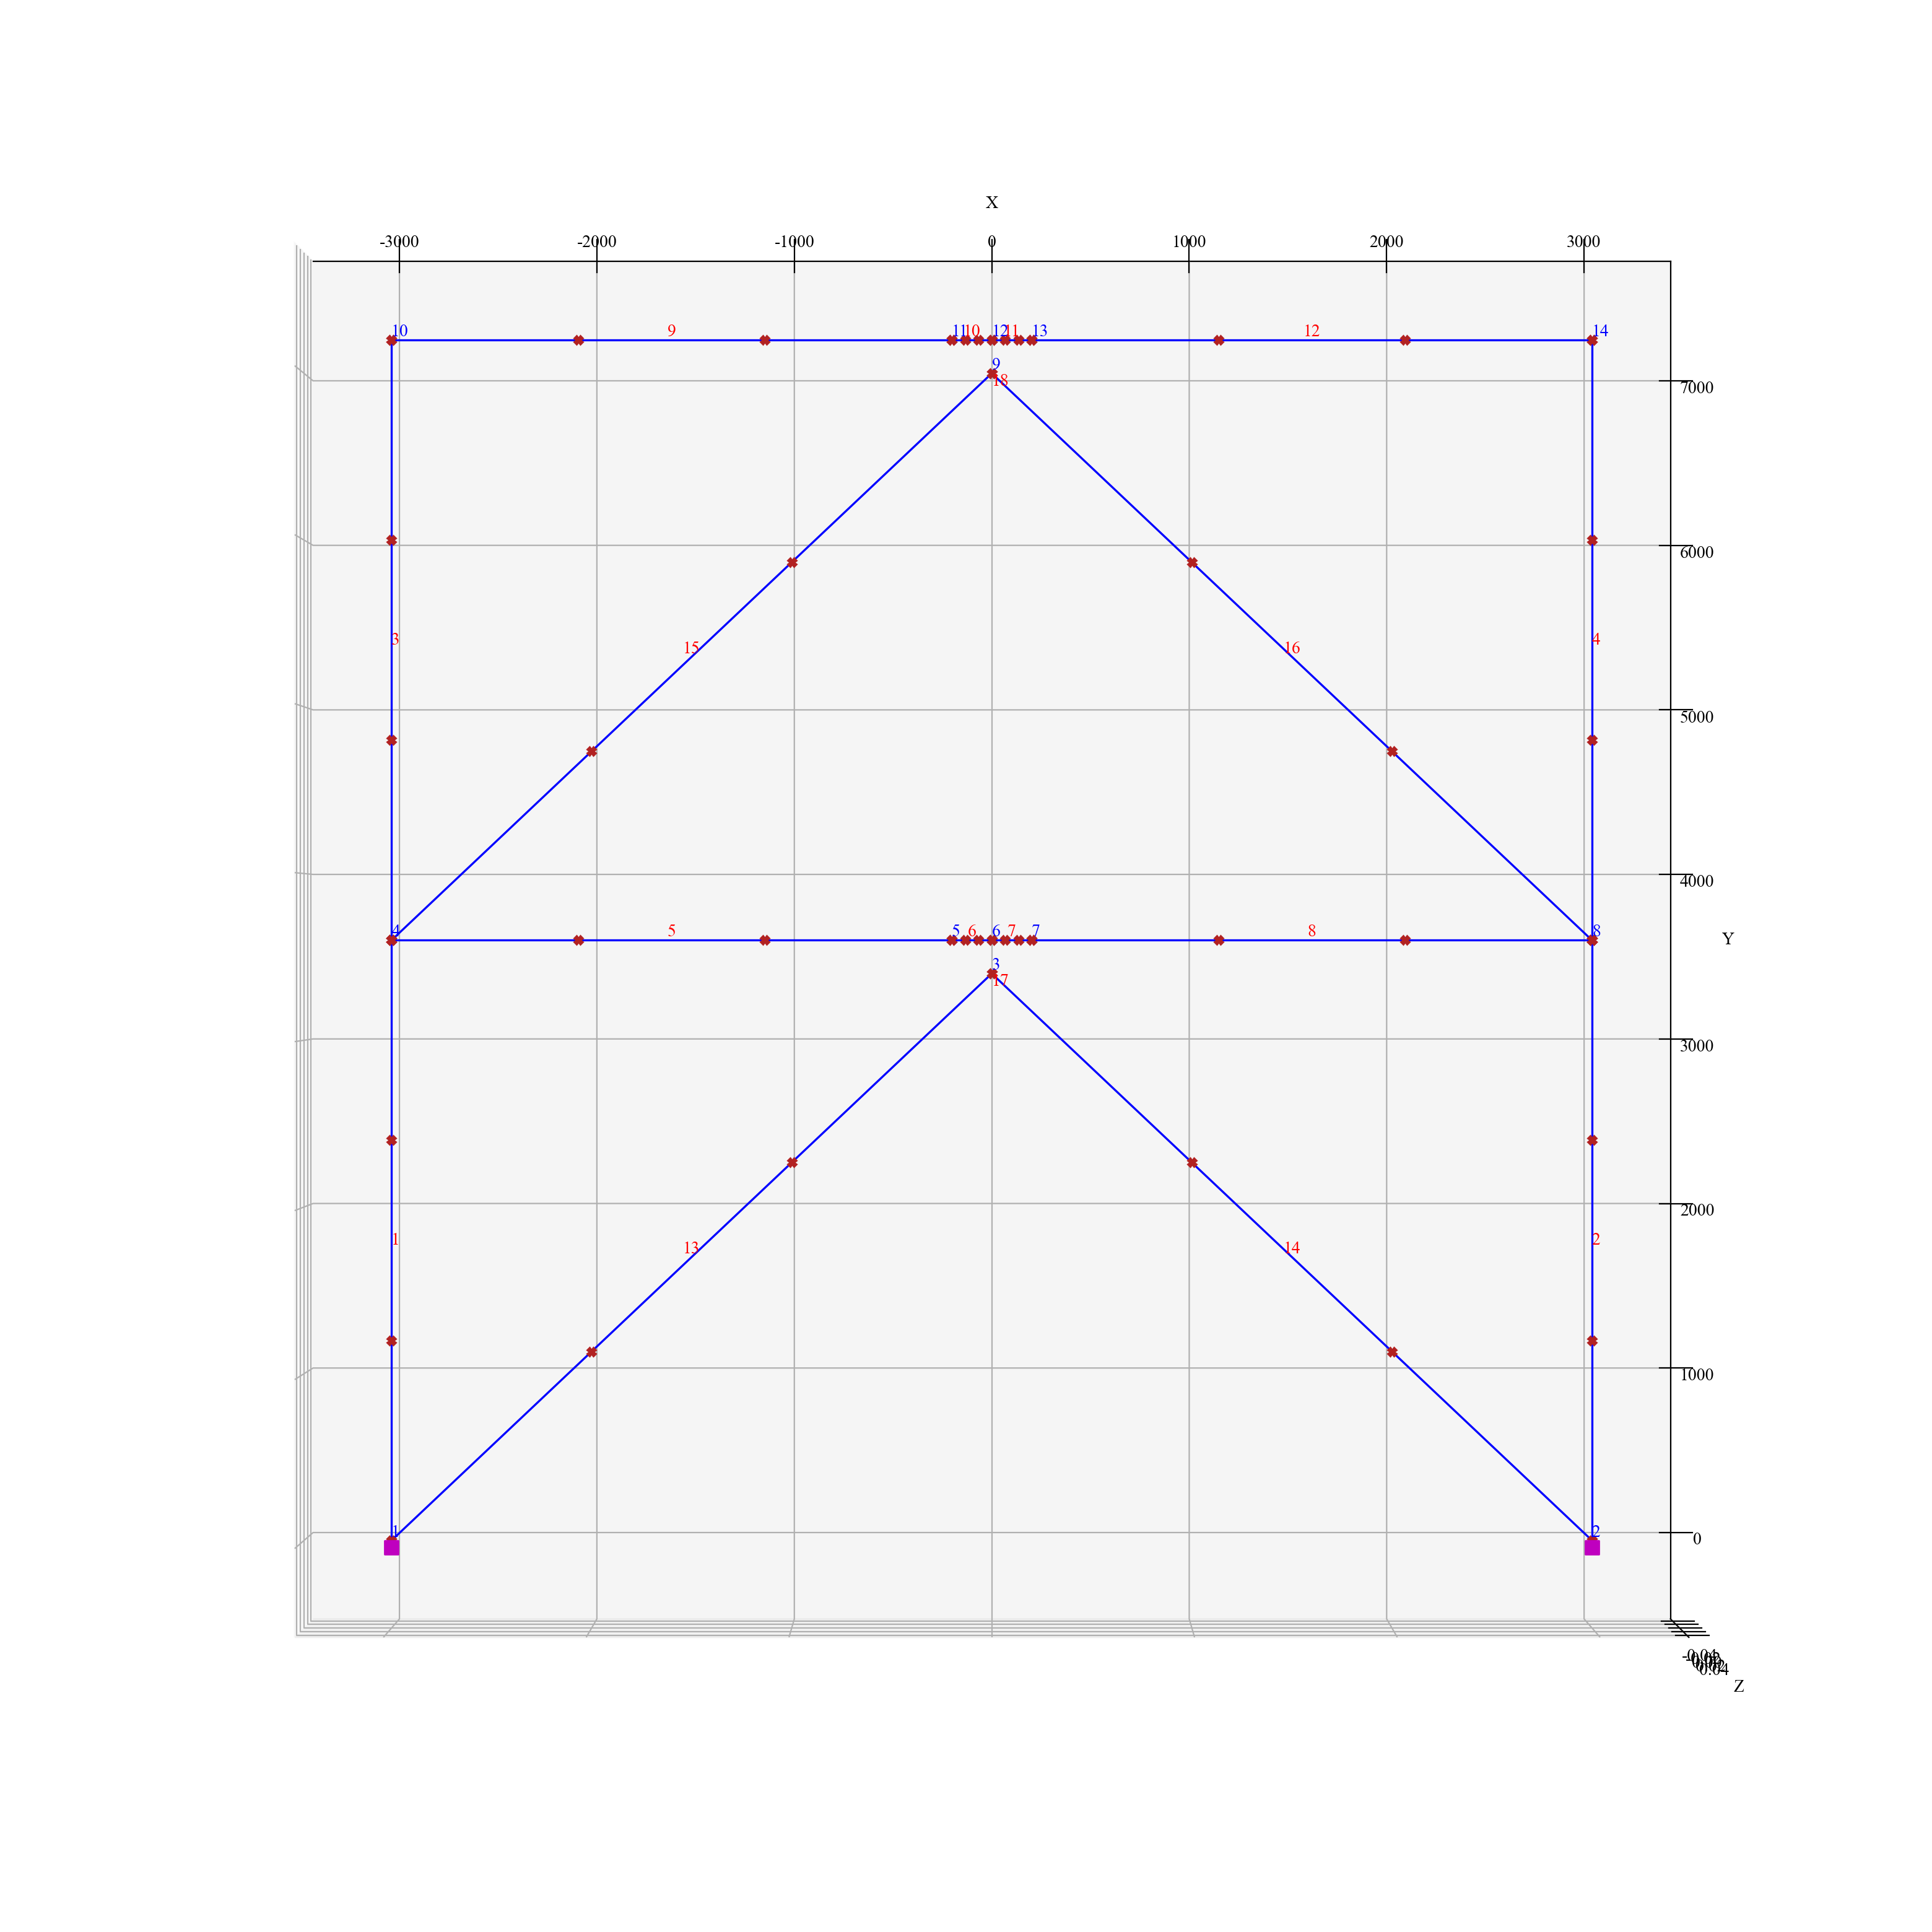

In [25]:
fig=plt.figure(figsize=(20,20),dpi=200)
ax=fig.gca(projection='3d')
opsv.plot_model(ax=ax,node_labels=1,element_labels=1,local_axes=False)
ax.view_init(90, 270, 'z')
plt.gca().set_box_aspect((5., 5., 1.))
plt.show()

## 地震波加载

In [26]:
ops.recorder('Node', '-file', "Disp12.txt","-time",'-node', 12,'-dof',1, 'disp')
ops.recorder('Node', '-file', "Disp9.txt","-time",'-node', 9,'-dof',1, 'disp')
ops.recorder('Node', '-file', "Reaction.txt","-time",'-nodeRange',1,2,'-dof',1, 'reaction')
ops.recorder('Element','-file',f"AF.txt","-time",'-ele',18,'localForce')
ops.recorder('Element','-file',f"DEF.txt","-time",'-ele',18,'deformation')
ops.timeSeries('Linear', 11)
ops.pattern('Plain', 100,11)
for i in range(5,13):
    ops.eleLoad("-ele", i, '-type', '-beamUniform', -20,0,0)
ops.constraints("Penalty", 1e8, 1e8)
ops.numberer("RCM")
ops.system('UmfPack')
ops.test('NormDispIncr', 1.e-2, 2000)
ops.algorithm('NewtonLineSearch')
ops.integrator("LoadControl", 0.1)
ops.analysis("Static")
ops.analyze(10)
ops.loadConst("-time", 0.0)

ops.timeSeries('Path',22,'-dt',0.02,'-filePath','El_NS.txt','-factor',10000)
ops.pattern('UniformExcitation', 200, 1, '-accel', 22)
ops.wipeAnalysis()
ops.constraints("Penalty", 1e8, 1e8)
# ops.constraints("Transformation")
ops.numberer('RCM')
ops.system('UmfPack')
ops.test("NormDispIncr", 1.e-5, 1000)
# ops.algorithm('KrylovNewton')
# ops.algorithm('ExpressNewton',2,1.0,'-currentTangent','-factorOnce')
ops.algorithm('NewtonLineSearch')
ops.integrator('Newmark', 0.5, 0.25)
ops.analysis('Transient')
ops.analyze(2688,0.02)

0

## 查看摩擦阻尼器耗能状态

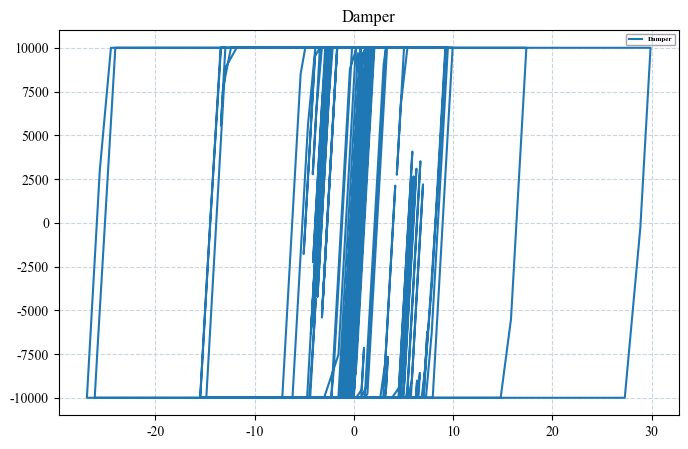

In [27]:
ops.wipe()
Disp=np.loadtxt(f'DEF.txt',usecols=1)
Force=np.loadtxt(f'AF.txt',usecols=1)
fig,ax=plt.subplots(nrows=1,ncols=1,figsize=(8,5),dpi=100)
ax.plot(-Disp,Force,label='Damper')

ax.grid(linestyle='--',color='#c9d6df')                      

ax.set_title(f'Damper')
ax.legend(prop=font_Times_New_Roman_legend,edgecolor='#928a97',facecolor='none')
plt.show()